# HSE nlp project. EDA. Dmitriy Lyalin

# Оглавление
1. [Провести анализ текстов: расчет средней, минимальной и максимальной длины текстов (визуализация распределения)](#section1)
2. [Частотный анализ слов и n-грамм, извлечение биграмм и триграмм](#section2)
3. [Статистики по символам и словам, распределение частей речи](#section3)
4. [Анализ метаинформации (дата публикации, авторство и т.д.), корреляции между признаками и текстами](#section4)
5. [Изучение связи текстовых признаков с целевой переменной](#section5)
6. [Визуализация данных: распределения классов, меток или числовых признаков](#section6)
7. [Визуализация данных: облако наиболее частотных слов и биграмм для выявления ключевых тем (Word Clouds)](#section7)
8. [Визуализация данных: методы снижения размерности (например, t-SNE) для визуализации текстовых представлений](#section8)
9. [Первичная предобработка текста: оценка и обработка пропусков, дубликатов; очистка текста от шумовых данных (ненужные символы, HTML-теги, специальные символы)](#section9)
10. [Преобразование регистра, исключение стоп-слов, токенизация, лемматизация или стемминг](#section10)
11. [Вывод о структуре данных, их особенностях и потенциальных проблемах на основе разведочного анализа данных](#section11)
12. [Другие формы разведочного анализа данных и интересные визуализации](#section12)

Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import nltk
from nltk import FreqDist
from nltk.util import ngrams
from collections import Counter
import plotly.io as pio
pio.renderers.default = 'svg'

In [2]:
pip install -U kaleido -q

Note: you may need to restart the kernel to use updated packages.


Посмотрим на наши данные

In [3]:
data = pd.read_parquet('/kaggle/input/hse-nlp-eda-dataset')

In [4]:
data.shape

(101, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   author          101 non-null    object
 1   author_surname  101 non-null    object
 2   title           101 non-null    object
 3   text            101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [6]:
data.head()

,author,author_surname,title,text
0,Alexandre_Dumas,Dumas,Celebrated_Crimes_Complete,"CELEBRATED CRIMES, COMPLETE BY ALEXANDRE DUMAS..."
1,Victor_Hugo,Hugo,Les_Misérables,LES MISÉRABLES By Victor Hugo Translated by I...
2,Lev_Tolstoy,Tolstoy,War_And_Peace,WAR AND PEACE By Leo Tolstoy/Tolstoi Contents...
3,Guy_De_Maupassant,Maupassant,Original_Short_Stories,GUY DE MAUPASSANT ORIGINAL SHORT STORIES VOLUM...
4,Miguel_De_Cervantes_Saavedra,Saavedra,Don_Quixote,bookcover.jpg Full Size spine.jpg (152K) Full...


#### <a id="section1"></a> 1. Проведем анализ текстов: расчет средней, минимальной и максимальной длины текстов (визуализация распределения)

In [7]:
data['text_length'] = data['text'].apply(len)
mean_length = data['text_length'].mean()
min_length = data['text_length'].min()
max_length = data['text_length'].max()
print(f"Средняя длина текста: {mean_length}")
print(f"Минимальная длина текста: {min_length}")
print(f"Максимальная длина текста: {max_length}")

Средняя длина текста: 734419.6336633663
Минимальная длина текста: 10892
Максимальная длина текста: 3512831


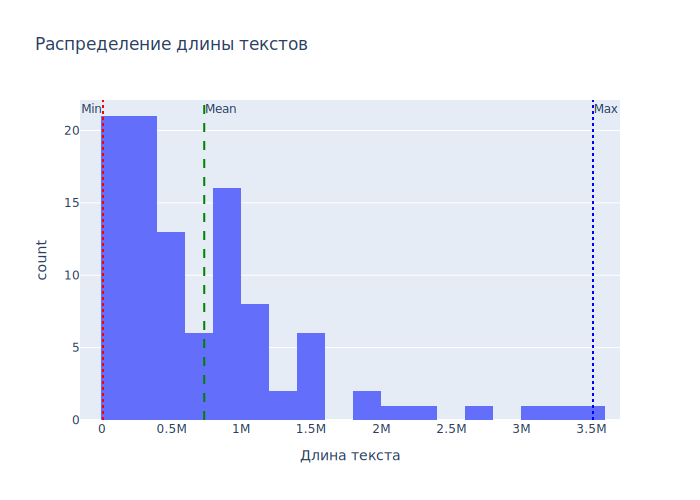

In [8]:
fig = px.histogram(
    data,
    x='text_length',
    nbins=30,
    title='Распределение длины текстов',
    labels={'text_length': 'Длина текста'}
)

fig.add_vline(x=mean_length, line_dash="dash", line_color="green", annotation_text="Mean", annotation_position="top right")
fig.add_vline(x=min_length, line_dash="dot", line_color="red", annotation_text="Min", annotation_position="top left")
fig.add_vline(x=max_length, line_dash="dot", line_color="blue", annotation_text="Max", annotation_position="top right")

fig.show()

#### <a id="section2"></a> 2. Частотный анализ слов и n-грамм, извлечение биграмм и триграмм

In [10]:
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords

def tokenize_and_clean(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]

def get_top_ngrams(corpus, n=1, top_k=10):
    all_ngrams = []
    for text in corpus:
        tokens = tokenize_and_clean(text)
        n_grams = list(ngrams(tokens, n))
        all_ngrams.extend(n_grams)
    
    ngram_freq = Counter(all_ngrams)
    return ngram_freq.most_common(top_k)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
top_unigrams = get_top_ngrams(data['text'], n=1, top_k=10)
top_bigrams = get_top_ngrams(data['text'], n=2, top_k=10)
top_trigrams = get_top_ngrams(data['text'], n=3, top_k=10)

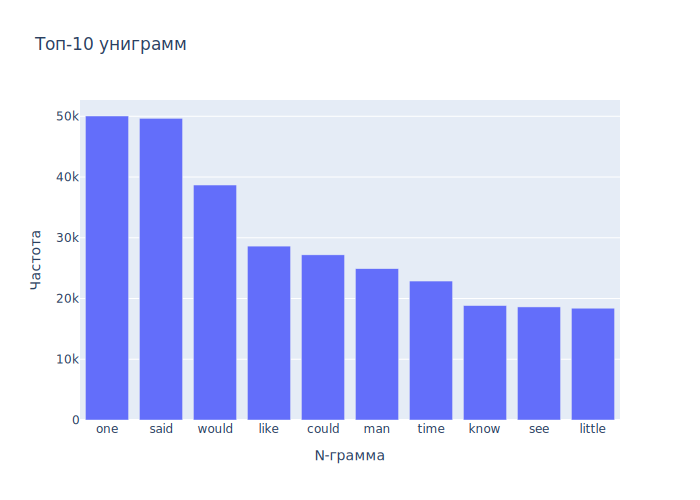

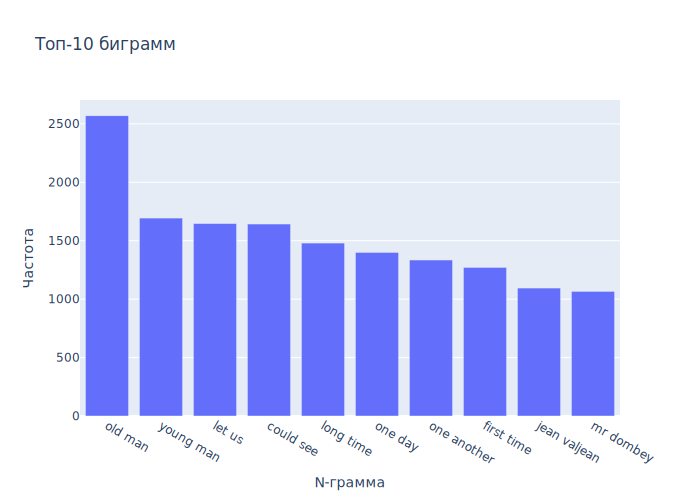

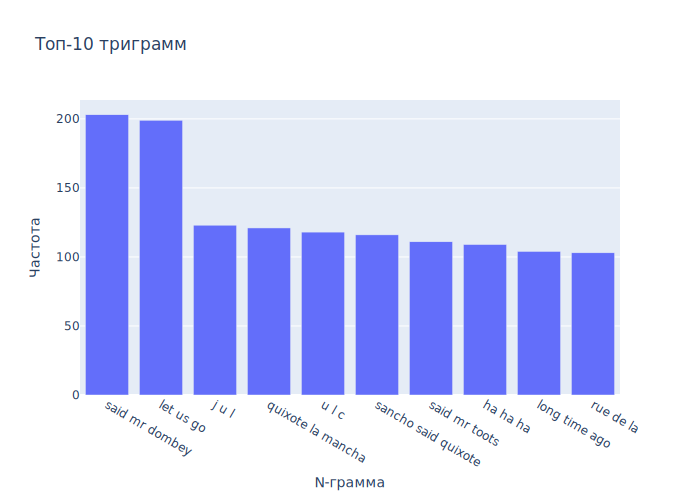

In [12]:
def plot_top_ngrams(ngrams, title):
    ngrams_df = pd.DataFrame(ngrams, columns=['ngram', 'count'])
    ngrams_df['ngram'] = ngrams_df['ngram'].apply(lambda x: ' '.join(x))
    fig = px.bar(ngrams_df, x='ngram', y='count', title=title, labels={'ngram': 'N-грамма', 'count': 'Частота'})
    fig.show()

plot_top_ngrams(top_unigrams, 'Топ-10 униграмм')
plot_top_ngrams(top_bigrams, 'Топ-10 биграмм')
plot_top_ngrams(top_trigrams, 'Топ-10 триграмм')

#### <a id="section3"></a> 3. Статистики по символам и словам, распределение частей речи
#### <a id="section4"></a> 4. Анализ метаинформации (дата публикации, авторство и т.д.), корреляции между признаками и текстами
#### <a id="section5"></a> 5. Изучение связи текстовых признаков с целевой переменной
#### <a id="section6"></a> 6. Визуализация данных: распределения классов, меток или числовых признаков
#### <a id="section7"></a> 7. Визуализация данных: облако наиболее частотных слов и биграмм для выявления ключевых тем (Word Clouds)
#### <a id="section8"></a> 8. Визуализация данных: методы снижения размерности (например, t-SNE) для визуализации текстовых представлений
#### <a id="section9"></a> 9. Первичная предобработка текста: оценка и обработка пропусков, дубликатов; очистка текста от шумовых данных (ненужные символы, HTML-теги, специальные символы)
#### <a id="section10"></a> 10. Преобразование регистра, исключение стоп-слов, токенизация, лемматизация или стемминг
#### <a id="section11"></a> 11. Вывод о структуре данных, их особенностях и потенциальных проблемах на основе разведочного анализа данных
#### <a id="section12"></a> 12. Другие формы разведочного анализа данных и интересные визуализации